Agenda:
1. Simple Moving Average
2. Cumulative Moving Average
3. Exponential Weight Moving Average
4. Moving Average (Formula) -> ACF
5. Autoregressive Model -> PACF

In [3]:
import pandas as pd
from datetime import datetime
import yfinance as yf

data = yf.download('TSLA')
print(data)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2010-06-29    1.592667    1.666667    1.169333    1.266667  281494500
2010-06-30    1.588667    2.028000    1.553333    1.719333  257806500
2010-07-01    1.464000    1.728000    1.351333    1.666667  123282000
2010-07-02    1.280000    1.540000    1.247333    1.533333   77097000
2010-07-06    1.074000    1.333333    1.055333    1.333333  103003500
...                ...         ...         ...         ...        ...
2025-01-13  403.309998  403.790009  380.070007  383.209991   67580500
2025-01-14  396.359985  422.640015  394.540009  414.339996   84565000
2025-01-15  428.220001  429.799988  405.660004  409.899994   81375500
2025-01-16  413.820007  424.000000  409.130005  423.489990   68335200
2025-01-17  426.500000  439.739990  419.750000  421.500000   94504200

[3663 rows x 5 colu

In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-01-13,403.309998,403.790009,380.070007,383.209991,67580500
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000


In [5]:
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
data

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-01-13,403.309998,403.790009,380.070007,383.209991,67580500
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000
2025-01-15,428.220001,429.799988,405.660004,409.899994,81375500


## Simple Moving Average

In simple moving average, let's say that our window size for rolling function is n. With respect to this window size, the nth simple moving average will have the initial n data points along with the n+1th data point, divided by n. This process will continue 1 step down the column.

<Axes: xlabel='Date'>

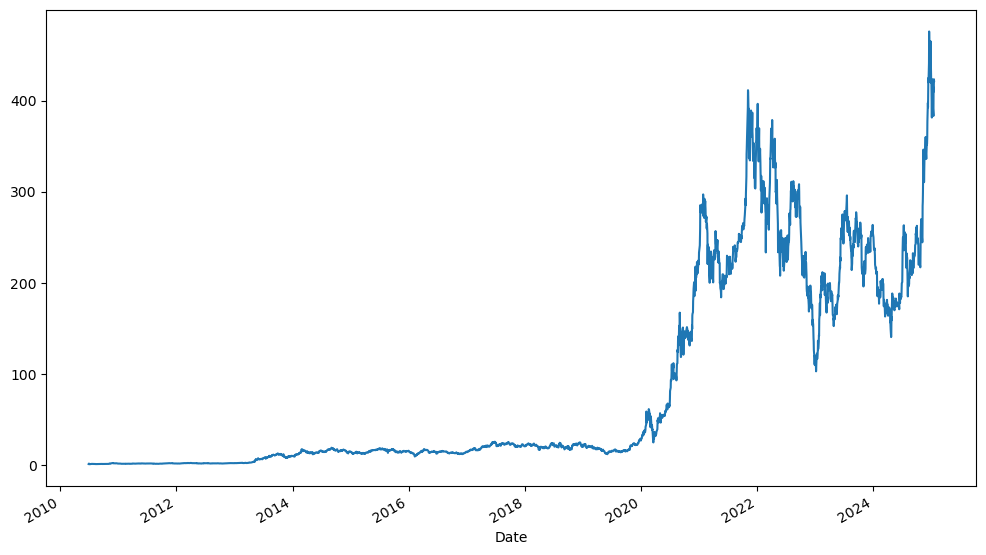

In [9]:
data['Open'].plot(figsize = (12, 7))

In [12]:
#Create a column with 10 day rolling average
data['Open: 10 days rolling'] = data['Open'].rolling(window = 10, min_periods = 1).mean()

<Axes: xlabel='Date'>

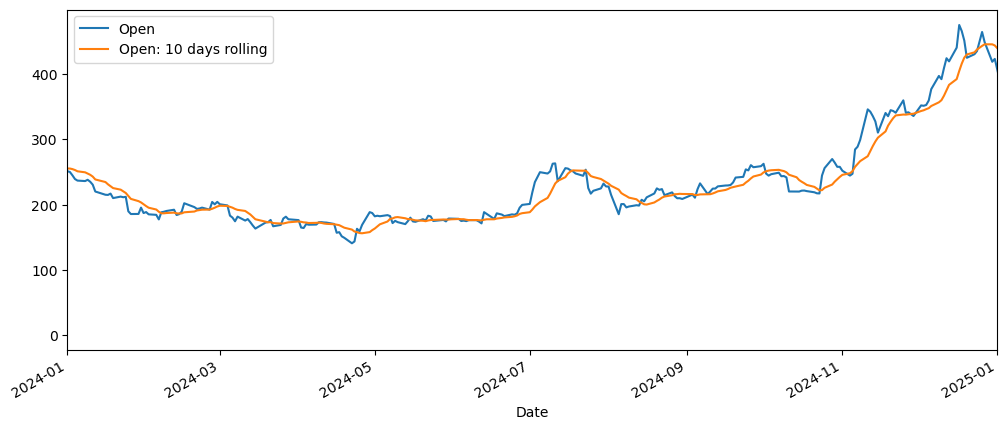

In [19]:
data[['Open', 'Open: 10 days rolling']].plot(xlim = ['2024-01-01', '2025-01-01'], figsize = (12, 5))

For the short term, the simple moving average is extensively used in stock markets. Depending on when it touches the actual price or whether the line lies above or below the price curve, the periods become favorable for buying or selling stocks

In [20]:
#Create a column with 30 day rolling average
data['Open: 30 days rolling'] = data['Open'].rolling(window = 30, min_periods = 1).mean()

#Create a column with 50 day rolling average
data['Open: 50 days rolling'] = data['Open'].rolling(window = 50, min_periods = 1).mean()

<Axes: xlabel='Date'>

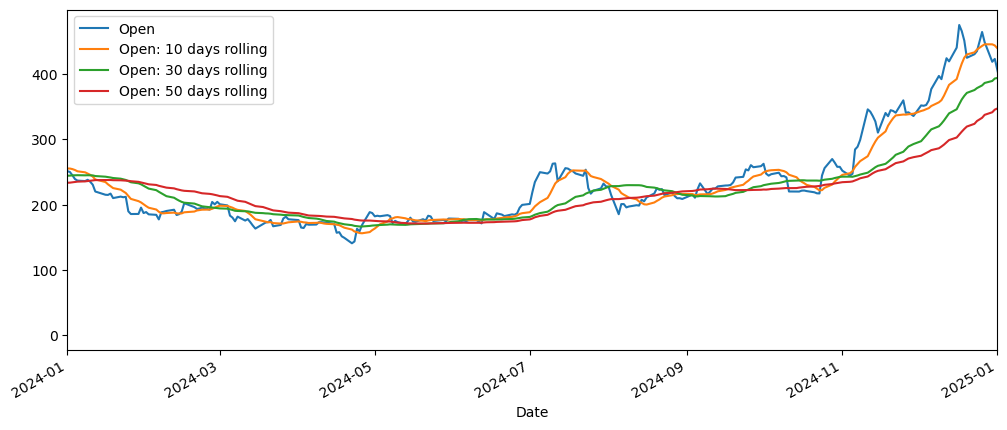

In [21]:
data[['Open', 'Open: 10 days rolling', 'Open: 30 days rolling', 'Open: 50 days rolling']].plot(xlim = ['2024-01-01', '2025-01-01'], figsize = (12, 5))

Disadvantage with respect to Simple Moving Averages:
Similar importance is given to all the data. However, we ideally want to give more weight to recent data. This extra weight is applied when we are working with EWMA (Exponential Weighted Moving Average).

## Cumulative Moving Average (CMA)
A cumulative moving average (CMA) is the average of all data points up to the current point, recalculated as each new data point is added.
Expanding helps calculate CMA.

<Axes: xlabel='Date'>

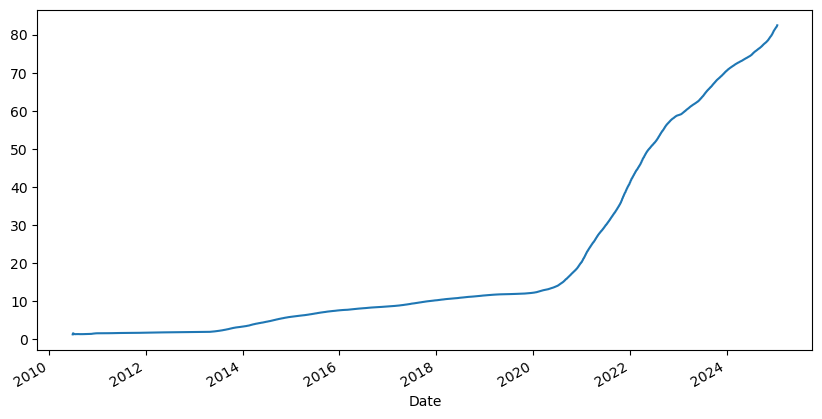

In [23]:
#Expanding

data['Open'].expanding().mean().plot(figsize = (10, 5)) #CMA of Open stock with respect to the different years

## Exponential Moving Average (EMA) and Exponential Weighted Moving Average (EWMA)
Our focus should be more on the recent data for proper projections. EMA provides weights to the recent data. 
EWMA is a type of moving average that applies exponentially decreasing weights to past data points, giving more importance to recent observations. These weights are based on a 'multiplier', which is 2/(n+1), where n is the EMA window size.

When we try to calculate EWMA, the formula changes.

EWMA (t) = a * x(t) + (1-a) * EWMA(t-1)

Here, 'a' is the weight giving priority to the recent data, as opposed to previous data. This prevents lags.

In [26]:
#Smoothing factor = 0.1. Here, it is alpha
data['EMA_0.1'] = data['Open'].ewm(alpha = 0.1, adjust = False).mean()

<Axes: xlabel='Date'>

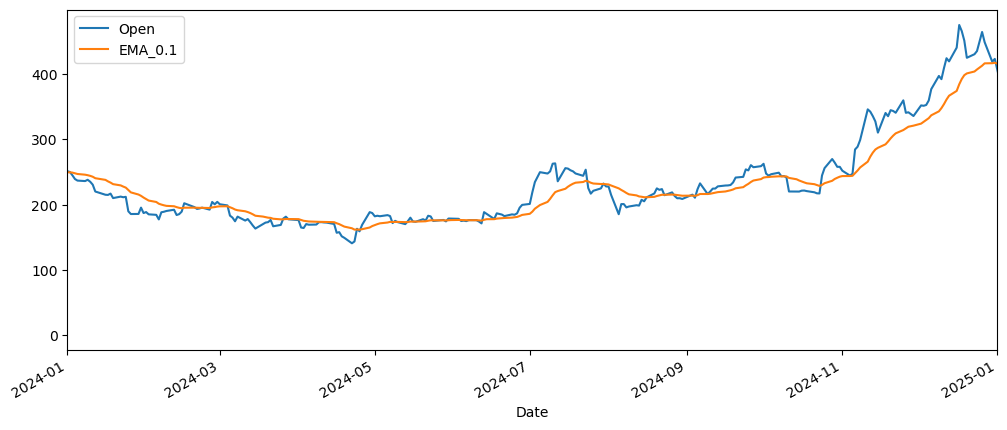

In [27]:
data[['Open', 'EMA_0.1']].plot(xlim = ['2024-01-01', '2025-01-01'], figsize = (12, 5))

In [29]:
#Smoothing factor = 0.3
data['EMA_0.3'] = data['Open'].ewm(alpha = 0.3, adjust = False).mean()

<Axes: xlabel='Date'>

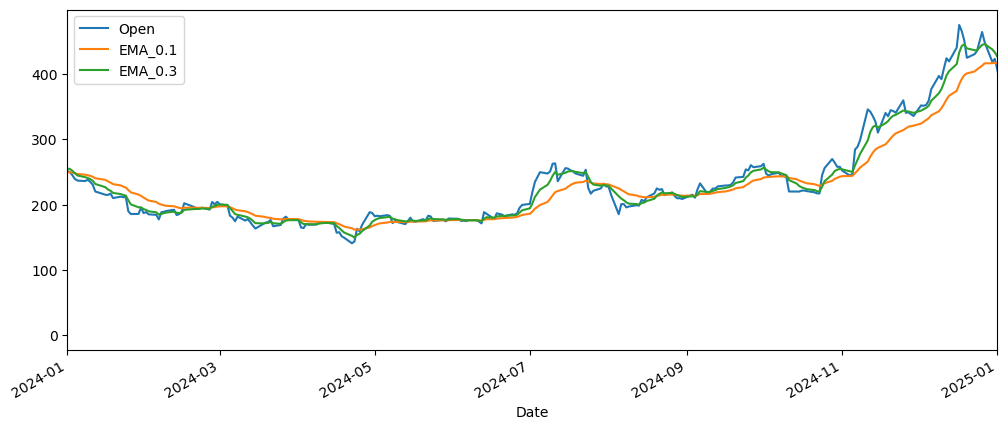

In [30]:
data[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim = ['2024-01-01', '2025-01-01'], figsize = (12, 5))

### EWMA

<Axes: xlabel='Date'>

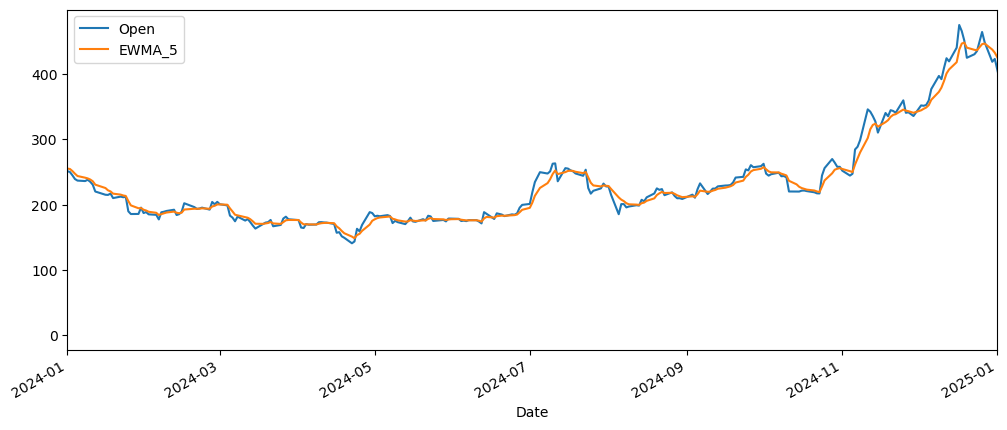

In [33]:
#Use span to calculate EWMA. Span  = 5 will be the 5-day EWMA
data['EWMA_5'] = data['Open'].ewm(span = 5).mean()
data[['Open', 'EWMA_5']].plot(xlim = ['2024-01-01', '2025-01-01'], figsize = (12, 5))

EWMA is the best compared to all other averages. 